Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data loading

In [3]:
dataset = pd.read_csv("House Price India.csv")

In [4]:
dataset.head(10)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
5,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000
6,6762813157,42491,5,3.25,3660,11995,2.0,0,2,3,...,2006,0,122008,52.7637,-114.050,3320,11241,3,72,785000
7,6762813599,42491,3,1.75,2240,10578,2.0,0,0,5,...,1923,0,122006,52.9254,-114.482,1570,10578,3,71,750000
8,6762813600,42491,3,2.50,2390,6550,1.0,0,2,4,...,1955,0,122009,52.8014,-114.598,2010,6550,1,73,750000
9,6762814461,42491,4,2.25,2200,11250,1.5,0,0,5,...,1920,0,122010,52.9145,-114.391,2320,10814,2,53,698000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

Univariate Analysis

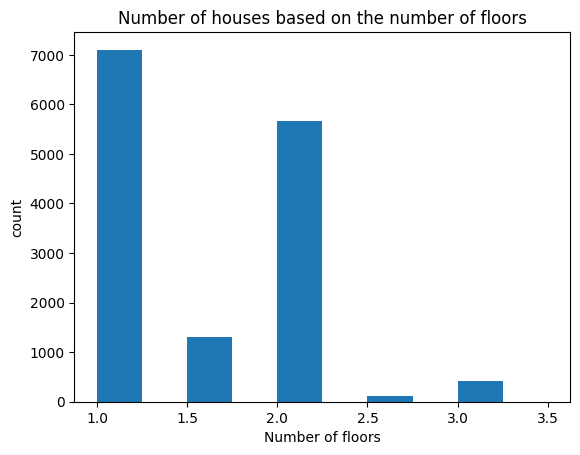

In [6]:
plt.hist(dataset["number of floors"])
plt.title("Number of houses based on the number of floors")
plt.ylabel("count")
plt.xlabel("Number of floors")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

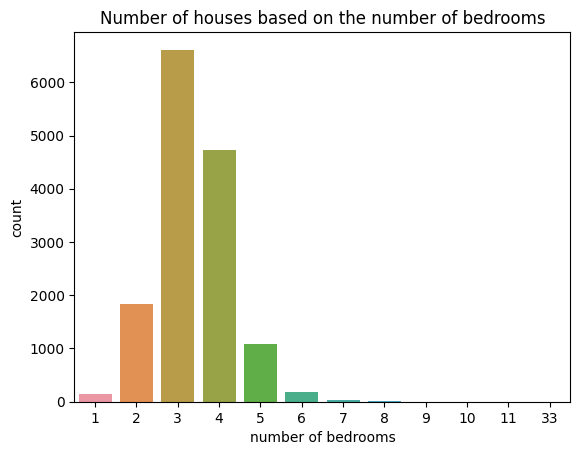

In [7]:
sns.countplot(x=dataset['number of bedrooms'])
plt.title("Number of houses based on the number of bedrooms")
plt.show

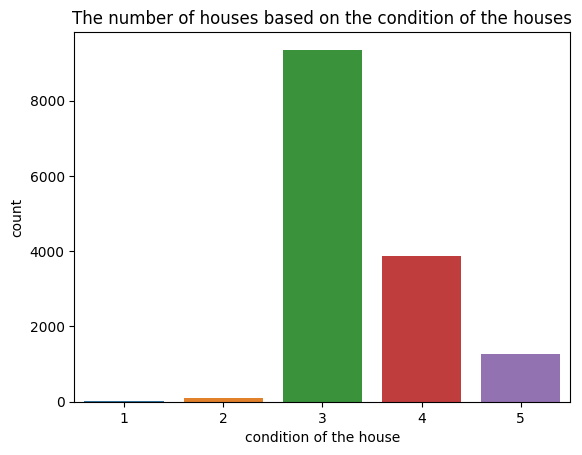

In [8]:
sns.countplot(x=dataset['condition of the house'])
plt.title("The number of houses based on the condition of the houses")
plt.show()

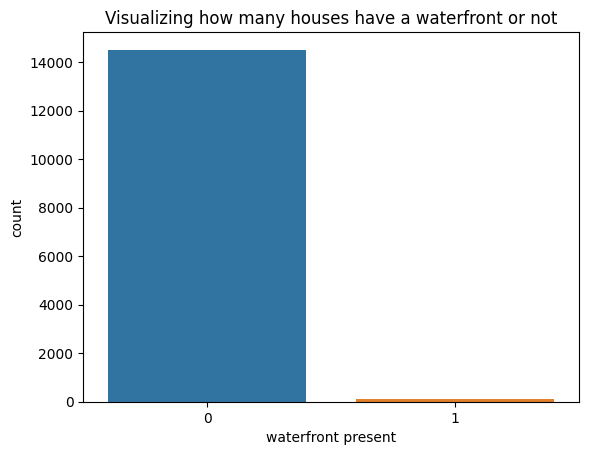

In [9]:
sns.countplot(x=dataset['waterfront present'])
plt.title("Visualizing how many houses have a waterfront or not")
plt.show()

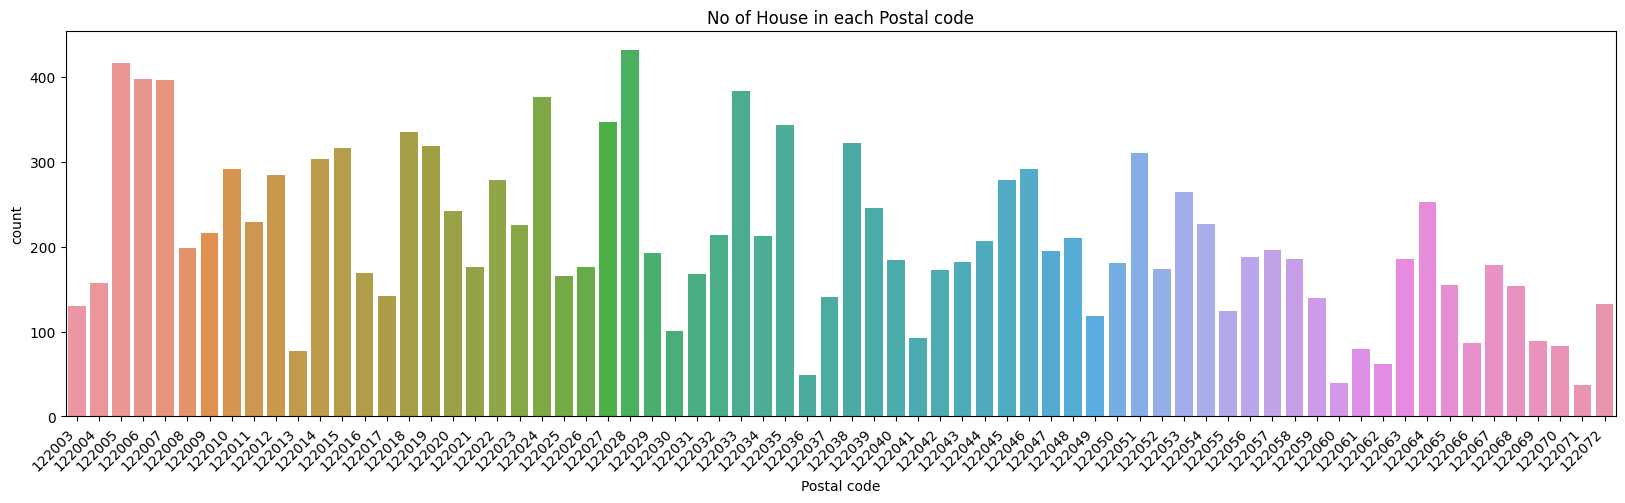

In [10]:
plt.figure(figsize=(20, 5))
chart = sns.countplot(x=dataset['Postal Code'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("No of House in each Postal code")
plt.ylabel("count")
plt.xlabel("Postal code")
plt.show()

In [11]:
begin = 1900
end = 2015
count = 0
house_built = []
built_year = []
for i in range(23):
  add = str(begin + 5)
  # built_year.append(f"{str(begin + 1)}-{add}")
  for j in range(len(dataset)):
    if int(dataset["Built Year"][j]) >= begin and int(dataset["Built Year"][j]) < int(add):
      built_year.append(f"{str(begin + count)}-{add}") 
  begin = int(add)
  count = 1 

In [12]:
for j in range(len(dataset)):
  if int(dataset["Built Year"][j]) == 2015:
     built_year.append("2011-2015")

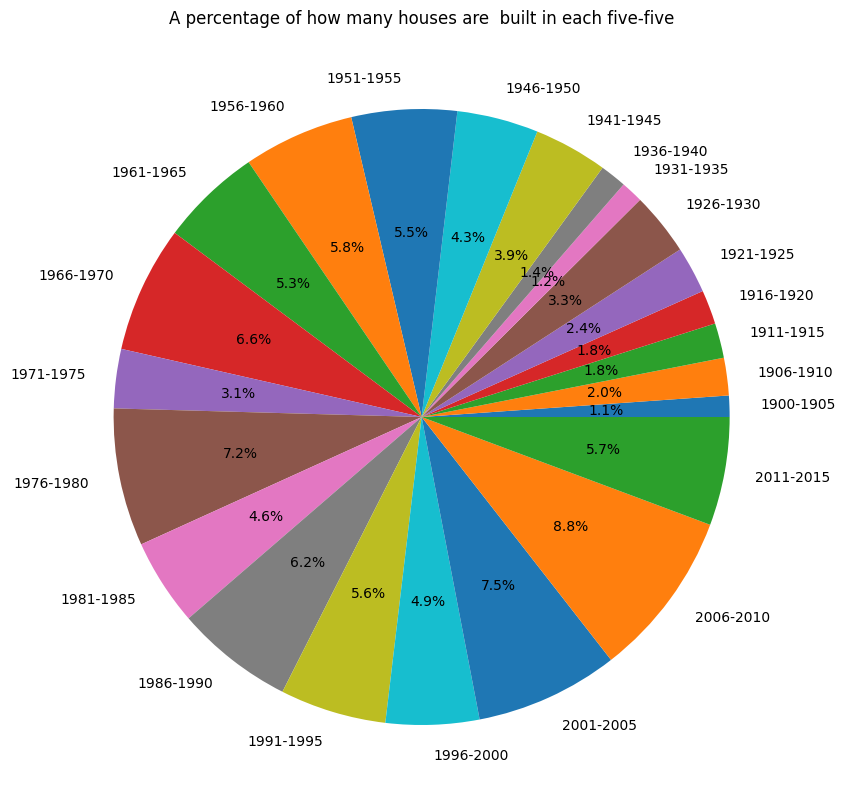

In [13]:
from collections import Counter
plt.figure(figsize=(20, 10))
x = dict(Counter(built_year))
plt.pie(x.values(),
        labels=x.keys(),
        autopct='%1.1f%%')
plt.title("A percentage of how many houses are  built in each five-five")
plt.show()

Bivariate analysis

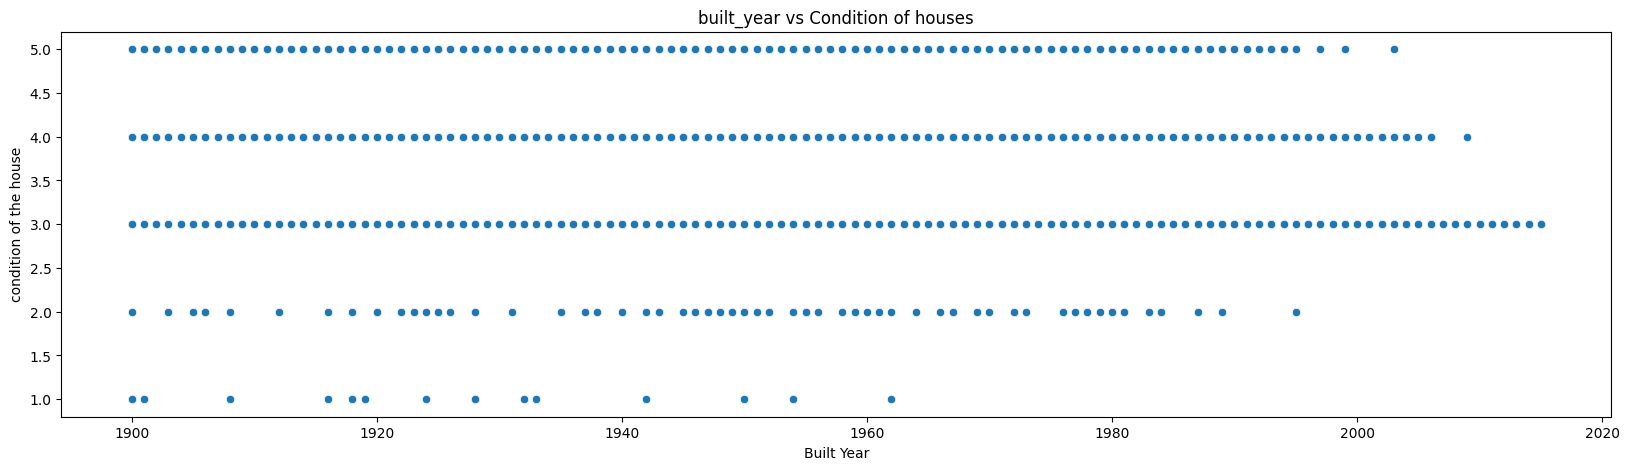

In [14]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x=dataset['Built Year'],
                y=dataset['condition of the house'])
plt.title("built_year vs Condition of houses")
plt.show()

Multivariate Analysis

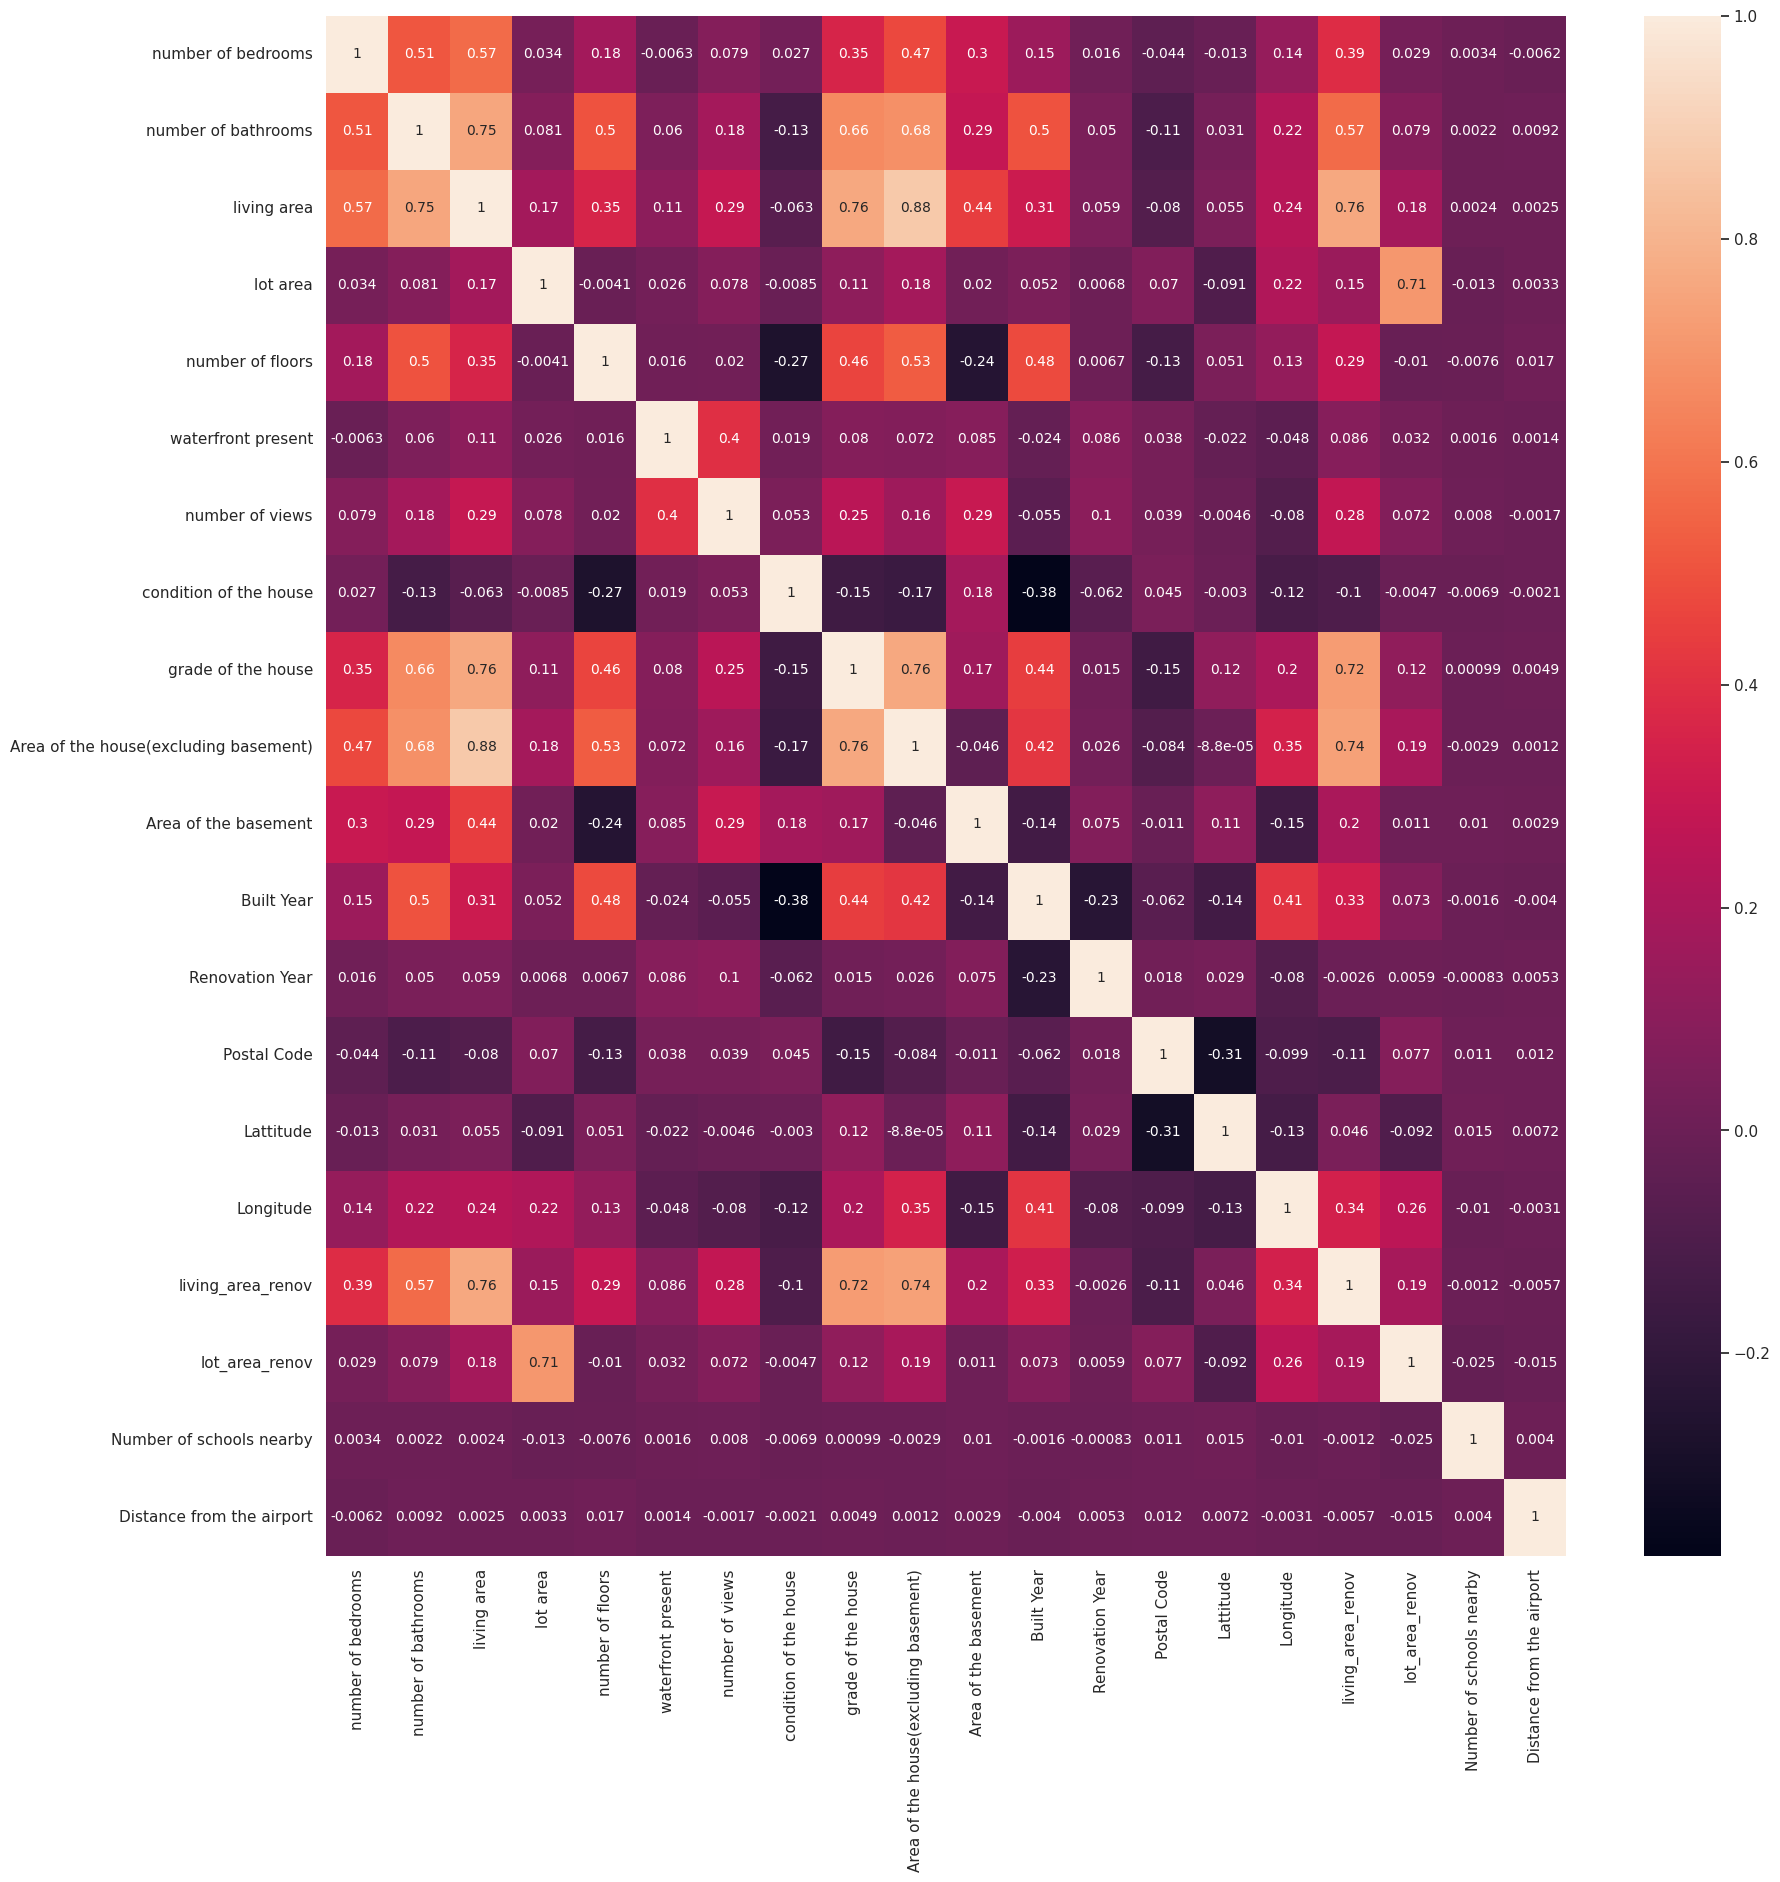

In [15]:
X = dataset.drop(['id', 'Date', "Price"], axis=1)
sns.set (rc = {'figure.figsize':(20, 20)})
sns.heatmap(X.corr(), annot=True, annot_kws={'size': 10})
plt.show()

Descriptive statistics on the dataset.

In [16]:
X.describe()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport
count,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000
mean,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,0.233105,3.430506,7.682421,1801.783926,296.479070,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958
std,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.766259,0.664151,1.175033,833.809963,448.551409,29.493625,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,370.000000,0.000000,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000
25%,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000
50%,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1580.000000,0.000000,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000
75%,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2240.000000,580.000000,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000
max,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000


Handle the Missing values.

There is no Null values in the dataset so that no need to take care of missing values